# MLP

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [9]:
train = pd.read_csv('./datasets/mnist_train.csv')
test = pd.read_csv('./datasets/mnist_test.csv')
x_train = train.iloc[:,1:]
x_test = test.iloc[:,1:]
y_train = train.iloc[:,0]
y_test = test.iloc[:,0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def plot_history(history, ax=None):
    if ax is None: fig,axs=plt.subplots(len(history.history.keys()),constrained_layout = True)
    for i,k in enumerate(history.history.keys()):
        axs[i].plot(history.history[k])
        plt.title(f'model {k}')
        axs[i].set(xlabel='epochs', ylabel=f'{k}')
        axs[i].legend(['train', 'test'], loc='upper left')

Epoch 1/50


2022-04-04 16:30:50.218549: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376313728 exceeds 10% of free system memory.


469/469 [==============================] - 3s 5ms/step - loss: 5.0829 - accuracy: 0.8501
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.6109 - accuracy: 0.8976
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3558 - accuracy: 0.9232
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2604 - accuracy: 0.9394
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2094 - accuracy: 0.9476
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1861 - accuracy: 0.9520
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1602 - accuracy: 0.9576
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1497 - accuracy: 0.9606
Epoch 9/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1335 - accuracy: 0.9649
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1393 - accuracy: 0.9629
Epoch 11/5

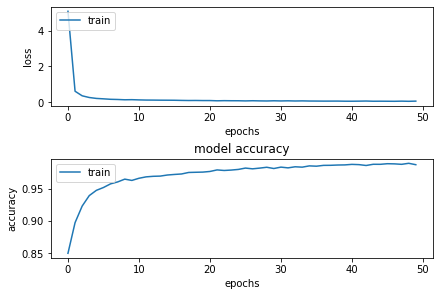

In [14]:
layers = [Dense(128, input_shape=(784,), activation='relu'), 
          #Dense(512, activation='relu'),
          #Dense(256, activation='relu'),
          #Dense(128, activation='relu'),
          Dense(10, activation='softmax')]
model = Sequential()
[model.add(l) for l in layers]
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=50, batch_size=128,verbose=1)
plot_history(history)
print(f"model accuracy with test data is: {model.evaluate(x_test,y_test,batch_size=128,verbose=0)[1]*100}%")

In [54]:
results = pd.DataFrame(columns=['layers', 'architecture', 'parameters', 'epochs', 'batch_size', 'accuracy'])
for epochs in [20]:
    batch_size = 128
    for a in range(1,10):
        for j in range(0,4):
            if j-1 > a: break
            layers = [Dense(2**a, input_shape=(784,), activation='relu')]
            [layers.append(Dense(2**(a-k),activation='relu')) for k in range(0,j)]
            layers.append(Dense(10, activation='softmax'))
            arch = f'784x{2**a}x'
            for k in range(0,j): arch =  arch + f'{2**(a-k)}x' 
            arch = arch + '10'
            model = Sequential()
            [model.add(l) for l in layers]
            model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
            history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=0)
            acc = model.evaluate(x_test,y_test,batch_size=128,verbose=0)[1]
            results.loc[len(results.index)] =[len(layers)-1, arch, model.count_params(), epochs, batch_size, acc]
            print(f"model (#layers={len(layers)-1}, #params={model.count_params()}, arch={arch}, epochs={epochs}) accuracy with test data is: {acc*100}%")

model (#layers=1, #params=1600, arch=784x2x10, epochs=20) accuracy with test data is: 11.371137201786041%
model (#layers=2, #params=1606, arch=784x2x2x10, epochs=20) accuracy with test data is: 33.763375878334045%
model (#layers=3, #params=1599, arch=784x2x2x1x10, epochs=20) accuracy with test data is: 11.35113537311554%
model (#layers=1, #params=3190, arch=784x4x10, epochs=20) accuracy with test data is: 54.22542095184326%
model (#layers=2, #params=3210, arch=784x4x4x10, epochs=20) accuracy with test data is: 29.622963070869446%
model (#layers=3, #params=3200, arch=784x4x4x2x10, epochs=20) accuracy with test data is: 36.313632130622864%
model (#layers=4, #params=3193, arch=784x4x4x2x1x10, epochs=20) accuracy with test data is: 11.35113537311554%
model (#layers=1, #params=6370, arch=784x8x10, epochs=20) accuracy with test data is: 76.19761824607849%
model (#layers=2, #params=6442, arch=784x8x8x10, epochs=20) accuracy with test data is: 85.63856482505798%
model (#layers=3, #params=6438,

In [55]:
results.sort_values('accuracy')

,layers,architecture,parameters,epochs,batch_size,accuracy
2,3,784x2x2x1x10,1599,20,128,0.113511
6,4,784x4x4x2x1x10,3193,20,128,0.113511
0,1,784x2x10,1600,20,128,0.113711
4,2,784x4x4x10,3210,20,128,0.296230
1,2,784x2x2x10,1606,20,128,0.337634
5,3,784x4x4x2x10,3200,20,128,0.363136
3,1,784x4x10,3190,20,128,0.542254
9,3,784x8x8x4x10,6438,20,128,0.627763
7,1,784x8x10,6370,20,128,0.761976
10,4,784x8x8x4x2x10,6428,20,128,0.823982


In [56]:
results.sort_values('architecture')

,layers,architecture,parameters,epochs,batch_size,accuracy
23,1,784x128x10,101770,20,128,0.959396
24,2,784x128x128x10,118282,20,128,0.968097
25,3,784x128x128x64x10,125898,20,128,0.971197
26,4,784x128x128x64x32x10,127658,20,128,0.969297
11,1,784x16x10,12730,20,128,0.895690
12,2,784x16x16x10,13002,20,128,0.917992
13,3,784x16x16x8x10,13058,20,128,0.929893
14,4,784x16x16x8x4x10,13054,20,128,0.917592
27,1,784x256x10,203530,20,128,0.965196
28,2,784x256x256x10,269322,20,128,0.967497


<AxesSubplot:xlabel='layers', ylabel='accuracy'>

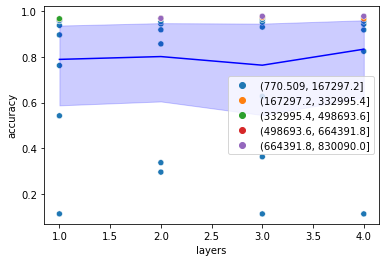

In [123]:
ax = plt.subplot()

sns.scatterplot(ax=ax,x=results['layers'], 
                y=results['accuracy'], 
                color='red', 
                hue=pd.cut(results['parameters'], 
                           bins=5))
sns.lineplot(ax=ax,
             x=results['layers'], 
             y=results['accuracy'], 
             color='blue')

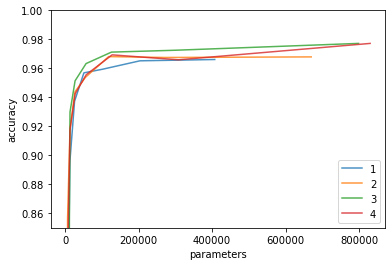

In [88]:
ax = plt.subplot()
ax.set_ylim([0.85,1])
for layer in results['layers'].unique():
    sns.lineplot(ax=ax,x=results[results['layers']==layer]['parameters'], y=results['accuracy'], alpha=0.8, palette=sns.color_palette("tab10")[0:results['layers'].nunique()])
ax.legend(results['layers'].unique())

<AxesSubplot:xlabel='parameters', ylabel='accuracy'>

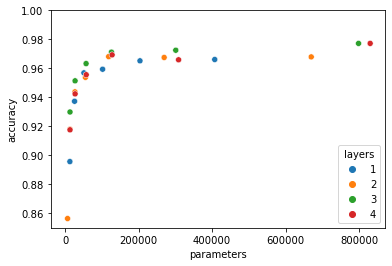

In [92]:
ax = plt.subplot()
ax.set_ylim([0.85,1])
sns.scatterplot(ax=ax,x=results['parameters'], y=results['accuracy'],hue=results['layers'], palette=sns.color_palette("tab10")[0:results['layers'].nunique()]) 

<AxesSubplot:xlabel='parameters', ylabel='accuracy'>

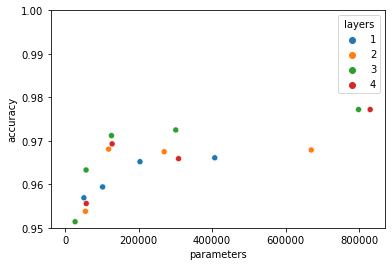

In [120]:
ax = plt.subplot()
ax.set_ylim([0.95,1])
sns.scatterplot(ax=ax,x=results['parameters'], y=results['accuracy'],hue=results['layers'], palette=sns.color_palette("tab10")[0:results['layers'].nunique()]) 

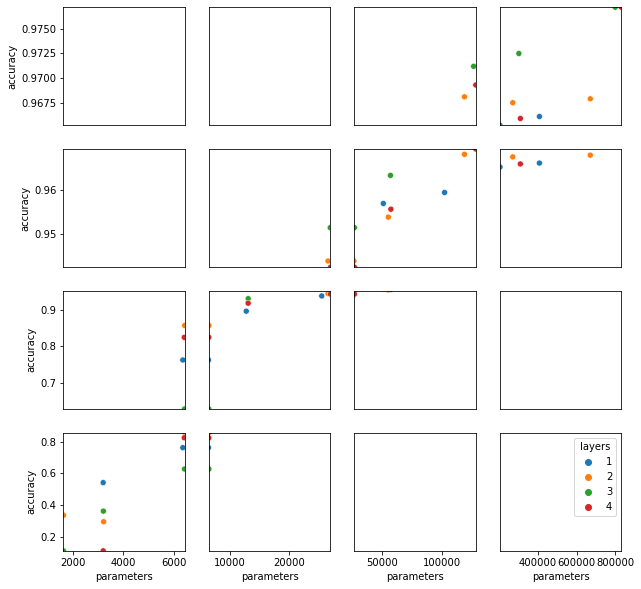

In [118]:
nrows, ncols = 4,4
fig, axs = plt.subplots(nrows,ncols, figsize=(10,10))
x_split = np.array_split(results['parameters'].values, nrows)
y_split = np.array_split(results['accuracy'].values, ncols)
for r1,r2 in zip(range(nrows),range(nrows)[::-1]):
    for c in range(ncols):
        a = axs[r1,c]
        a.set_xlim([x_split[c][0],x_split[c][-1]])
        a.set_ylim([y_split[r2][0],y_split[r2][-1]])
        
        sns.scatterplot(
            ax=a,
            x=results['parameters'], 
            y=results['accuracy'],
            hue=results['layers'], 
            palette=sns.color_palette("tab10")[0:results['layers'].nunique()]) 
        if r1 != nrows-1 or c != ncols-1: a.get_legend().remove()
        if r1 < nrows-1: a.get_xaxis().set_visible(False)
        if c > 0: a.get_yaxis().set_visible(False)
        

## Conclusion
The more layers we add the less the model is sensitive to parameters addition. In other words, if we have many layers, increasing their size has very few effects. On the other hand, with few layers, increasing their size has a strong effect on accuracy. We therefore find out that we already got a pretty good accuracy with only one dense layer of `512` entries. The optimal network size seems to be the one with 4 layers and the architecture `784x512x128x64x10` that sums up to `125898` parameters.